# Hyperparameter Optimization
In this tutorial we demonstrate the following:
- Build a JSON config to perform a hyperparameter optimization for
a random forest using Bayesian optimization.
- Perform the optimization process.
- Select the best model and display optimal hyperparameter choices.

Hyperparameters detail specifics of the learning process or model
that are not learned in the training process. For example, the 
number of random trees is a hyperparameter for a random forest
whereas a parameter for a random forest is which features go into
a tree node and where the split points are for each feature.

The choice for hyperprameters strongly influence model performance,
so it is important to be able to optimize them as well. [AMPL](https://github.com/ATOMScience-org/AMPL)
offers a variety of hyperparameter optimization methods including
random sampling, grid search, and Bayesian optimization. 

## Setup directories
Describe important features like descriptor type and output directories. Make sure the directories are created before training the models.

In [149]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

descriptor_type = 'rdkit_raw'
output_dir = 'output_kcna3_rdkit_raw'
tmp_dir = 'tmp_kcna3_rdkit_raw'
split_uuid = "3c4e7b81-35e8-49c1-97c8-6a12faa36df4"

if not os.path.exists(f'./{output_dir}'):
    os.mkdir(f'./{output_dir}')
    
if not os.path.exists(f'./{tmp_dir}'):
    os.mkdir(f'./{tmp_dir}')

## JSON Settings.
- `'hyperparam':True` This setting indicates that we are performing
a hyperparameter search instead of just training one model.
- `'search_type':'hyperopt'` This specifies the hyperparameter
search method. Other options include grid, random, and geometric.
Specifications for each hyperparameter search method is different,
please refer to the full documentation. Here we are using the
Bayesian optimization method.
- `'model_type':'RF|10'` This means [AMPL](https://github.com/ATOMScience-org/AMPL) will try 10 times to 
find the best set of hyperparameters using random forests. In 
production this parameter could be set to 100 or more.
- `'rfe':'uniformint|8,512'` The Bayesian optimizer will uniformly
search between 8 and 512 for the best number of random forest estimators.
Similarly `rfd` stands for random forest depth and `rff` stands for
random forest features.
- `result_dir` Now expects two parameters. The first directory
will contain the best trained models while the second directory will
contain all models trained in the search.

In [150]:
config = {
    "hyperparam": "True",
    "prediction_type": "regression",

    "dataset_key": "dataset/curated_kcna3_ic50.csv",
    "id_col": "compound_id",
    "smiles_col": "base_rdkit_smiles",
    "response_cols": "avg_pIC50",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{output_dir},./{tmp_dir}"
}

In tutorial 4 we directly imported the `parameter_parser` and `model_pipeline` objects to parse the `config` dict and train a single model. Here, we use `hyperparameter_search_wrapper` to handle many models for us. First we build the search by creating a list of parameters to use, and then we run the search.

In [151]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw

params = hsw.parse_params(config)
hs = hsw.build_search(params)
hs.run_search()

model_performance|train_r2|train_rms|valid_r2|valid_rms|test_r2|test_rms|model_params|model

rf_estimators: 82, rf_max_depth: 19, rf_max_feature: 165                        
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.975|0.291|0.707|0.774|0.821|0.719|82_19_165|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_3adb77c7-59bc-4c89-b986-0bab21bf30f8.tar.gz

rf_estimators: 246, rf_max_depth: 12, rf_max_feature: 92                        
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 10%|█         | 1/10 [00:00<00:02,  3.44trial/s, best loss: 0.2930857053644045]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.975|0.289|0.733|0.739|0.825|0.710|246_12_92|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_fc3c50a4-92cd-4124-9d51-d0e869a4b49b.tar.gz

rf_estimators: 276, rf_max_depth: 22, rf_max_feature: 18                        
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 20%|█▊       | 2/10 [00:00<00:03,  2.05trial/s, best loss: 0.26667698519247107]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.975|0.286|0.728|0.746|0.825|0.710|276_22_18|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_e54ea9f6-d86c-45f0-a4b6-2ebd5b4ffb61.tar.gz

rf_estimators: 206, rf_max_depth: 28, rf_max_feature: 143                       
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 30%|██▋      | 3/10 [00:01<00:03,  2.02trial/s, best loss: 0.26667698519247107]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.976|0.285|0.717|0.761|0.820|0.721|206_28_143|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_0ddc4a85-2686-4ade-b633-e0aaef617289.tar.gz

rf_estimators: 399, rf_max_depth: 28, rf_max_feature: 112                       
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 40%|███▌     | 4/10 [00:02<00:03,  1.87trial/s, best loss: 0.26667698519247107]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.975|0.286|0.714|0.765|0.818|0.723|399_28_112|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_4ccb1f76-6f68-45ec-b868-75879dd67cc3.tar.gz

rf_estimators: 51, rf_max_depth: 26, rf_max_feature: 178                        
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
model_performance|0.974|0.294|0.722|0.755|0.816|0.728|51_26_178|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_7ab655d2-d036-4643-bc55-f25e32e910de.tar.gz

rf_estimators: 34, rf_max_depth: 9, rf_max_feature: 84                          
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 60%|█████▍   | 6/10 [00:03<00:02,  1.92trial/s, best loss: 0.26667698519247107]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.972|0.307|0.729|0.745|0.812|0.735|34_9_84|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_43570a44-2e3a-4af8-9d8a-e3de2d52196c.tar.gz

rf_estimators: 429, rf_max_depth: 6, rf_max_feature: 63                         
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 70%|██████▎  | 7/10 [00:03<00:01,  2.46trial/s, best loss: 0.26667698519247107]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.947|0.420|0.710|0.770|0.820|0.719|429_6_63|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_808e6f6a-e39c-4474-a656-8cb1090aca8f.tar.gz

rf_estimators: 461, rf_max_depth: 28, rf_max_feature: 59                        
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
 80%|███████▏ | 8/10 [00:04<00:00,  2.00trial/s, best loss: 0.26667698519247107]

/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.976|0.285|0.724|0.751|0.824|0.711|461_28_59|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_ae58b7a7-71ab-44e3-b93f-7f421533b121.tar.gz

rf_estimators: 41, rf_max_depth: 17, rf_max_feature: 59                         
num_model_tasks is deprecated and its value is ignored.                         
RF model with computed_descriptors and rdkit_raw                                
model_performance|0.974|0.296|0.716|0.763|0.825|0.711|41_17_59|./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_b64c02fc-7c71-4534-b824-a2fcbeb76183.tar.gz

100%|████████| 10/10 [00:05<00:00,  1.93trial/s, best loss: 0.26667698519247107]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: ./tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_fc3c50a4-92cd-4124-9d51-d0e869a4b49b.tar.gz, valid R2: 0.7333230148075289


/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)

/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



The best model will be saved in `output_kcna3_rdkit_raw` along with a csv file
containing regression performance for all trained models.

The rest of the models are saved in `tmp_kcna3_rdkit_raw`. These models can be
explored using `get_filesystem_perf_results`.

In [152]:
import atomsci.ddm.pipeline.compare_models as cm

result_df = cm.get_filesystem_perf_results(
    result_dir='tmp_kcna3_rdkit_raw',
    pred_type='regression'
)

# sort by validation r2 score to find the best model
result_df = result_df.sort_values(by='best_valid_r2_score', ascending=False)
result_df.head(2)

Found data for 20 models under tmp_kcna3_rdkit_raw


,model_uuid,model_path,ampl_version,model_type,dataset_key,features,splitter,model_score_type,feature_transform_type,model_choice_score,...,rf_max_depth,max_epochs,best_epoch,learning_rate,layer_sizes,dropouts,xgb_gamma,xgb_learning_rate,model_parameters_dict,feat_parameters_dict
11,fc3c50a4-92cd-4124-9d51-d0e869a4b49b,tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_f...,1.6.0,RF,/home/apaulson/repos/AMPL_umbrella/AMPL/atomsc...,rdkit_raw,scaffold,r2,normalization,0.733323,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 246, ""rf_max_depth"": 12, ""rf...",{}
2,4e191edb-7808-406d-9cd8-1b62b9fb4ea9,tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_4...,1.6.0,RF,/home/apaulson/repos/AMPL_umbrella/AMPL/atomsc...,rdkit_raw,scaffold,r2,normalization,0.732009,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 127, ""rf_max_depth"": 22, ""rf...",{}


The column `best_valid_r2_score` contains the validation set R2_score which determines how we select the best model. The column `model_parameters_dict` contains hyperparamters used for the best model. We can visualize this model using `plot_pred_vs_actual_from_file`.

In [153]:
result_df.iloc[0].best_valid_r2_score

0.7333230148075289

In [154]:
result_df.iloc[0].model_parameters_dict

'{"rf_estimators": 246, "rf_max_depth": 12, "rf_max_features": 92}'

2024-01-24 15:06:30,600 tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_4e191edb-7808-406d-9cd8-1b62b9fb4ea9.tar.gz, 1.6.0
2024-01-24 15:06:30,601 Version compatible check: tmp_kcna3_rdkit_raw/curated_kcna3_ic50_model_4e191edb-7808-406d-9cd8-1b62b9fb4ea9.tar.gz version = "1.6", AMPL version = "1.6"
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)
/home/apaulson/atomsci/lib/python3.9/site-packages/deepchem/data/datasets.py:473: RuntimeWarning: overflow encountered in multiply
  X_m2 += dx * (X - X_means)
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


num_model_tasks is deprecated and its value is ignored.


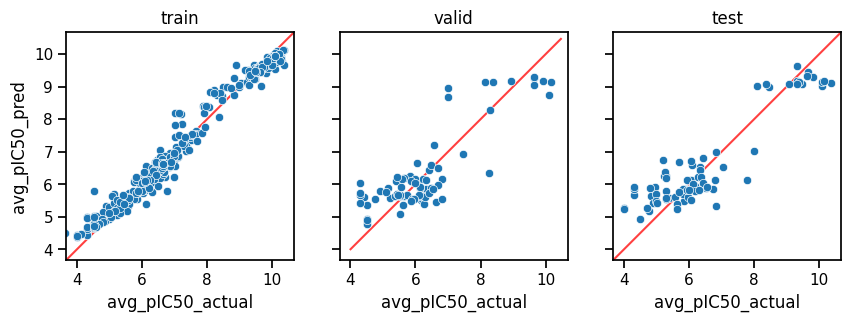

In [155]:
pp.plot_pred_vs_actual_from_file(model_path)